<a href="https://colab.research.google.com/github/guihunwansui/CV/blob/main/final_project_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.tree as skt
import sklearn.ensemble as skens

## Introduction

### Assignment

In this final project you be analyzing a data set using techniques from Data Science 101. The goal of this project is to demonstrate your ability to apply the concepts you have learned in this course to a real-world data set. You will be graded on the quality of your analysis, the clarity of your code, and the effectiveness of your communication.

Each section will contain a brief description of the task, followed by a code cell where you will write your code. You should write your code in the code cell and run it to generate the output. You will need to interpret the results of your analysis in a way that is understandable to people without a background in statistics or Python programming You should use markdown to format your text in a legible way.

**Individual Effort Policy**: You may use any resources you like to complete this project, including the internet, textbooks, and discussions with other people. You may also use GenAI tools like Copilot or ChatGPT. It is expected that students will use GenAI tools for writing code, and no citation will be required for GenAI assisted code. For the written portions of the project, use of GenAI should be cited in a way that make clear how the GenAI tool was used. The *GenAI Appendix* section at the end provides a template you can use to indicate how you used tools like ChatGPT for each section. You should be prepared to explain any code or written responses that you submit upon request.

### Background

In this assignment, we will analyze two data sets from "Wolves and Moose of Isle Royale" project. The data sets contain information about the populations of wolves and moose on Isle Royale, an island in Lake Superior. The data sets include information about the number of wolves and moose on the island, as well as other variables that may be related to the populations of wolves and moose.

> Isle Royale is a remote wilderness island, isolated by the frigid waters of Lake Superior, and home to populations of wolves and moose. As predator and prey, their lives and deaths are linked in a drama that is timeless and historic. Their lives are historic because we have been documenting their lives for more than five decades. This research project is the longest continuous study of any predator-prey system in the world. ([Source](https://isleroyalewolf.org/overview/overview/at_a_glance.html))

You may find it helpful to read the most recent [Annual Report](https://isleroyalewolf.org/sites/default/files/annual-report-pdf/WolfMooseReport_2024_final-web.pdf) to learn more about the project.


## Data

The data for this project are contained in two CSV files:

In [ ]:
wolf_moose_yearly = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/wolf_moose_yearly.csv", na_values = ["NA", "N/A", "N/A yet", "NA yet"])
moose_deaths = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/moose_deaths.csv")

The `wolf_moose_yearly` data set contains yearly counts of wolf and moose population, along with variables about the environment and other factors that may be related to the populations. The `moose_deaths` data set contains information about the age and size of decreased moose on Isle Royale.

**Task**: Report the number of rows and columns in each data set. Report the column names in each data set.

In [ ]:
print(wolf_moose_yearly.shape)
print(moose_deaths.shape)
print(wolf_moose_yearly.columns)
print(moose_deaths.columns)

(61, 15)
(662, 8)
Index(['year', 'wolves', 'moose', 'kill rate', 'predation rate',
       'moose recruitment rate', 'moose mean age excluding calves',
       'July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)',
       'May-Aug (precip, inches)', 'NAO (DJFM - station based)',
       'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)'],
      dtype='object')
Index(['Sex', 'Year of birth', 'Cranial Volume (cm3)',
       'Winter temperature (standardized)', 'Moose abundance (standardized)',
       'Wolf abundance (standardized)', 'Winter temperature (categorical)',
       'Age at death'],
      dtype='object')


### Codebook

These data do not include a code-book, but there is written documentation on many of the concepts of what is measured on the [Data & Interpreation](https://isleroyalewolf.org/data/data/home.html) page from the Isle Royale project. For the "NAO" columns, see [this page](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based).

**Task**: We will create our own code-book. For each of the variables in both tables complete this template:

* Variable Name:
* Description:
* Type: (e.g., numeric, categorical, etc.)

If there are several variables that are essentially the same, you may summarize them together as a single entry.

In [ ]:
from prettytable import PrettyTable

wolf_moose_yearly_codebook = [
    ["Variable", "Description", "Type"],
    ["year", "The year of the observation", "Numeric (Discrete)"],
    ["wolves", "The number of wolves observed in that year", "Numeric (Discrete)"],
    ["moose", "The number of moose observed in that year", "Numeric (Discrete)"],
    ["kill rate", "The proportion of moose killed by wolves in that year", "Numeric (Continuous)"],
    ["predation rate", "The proportion of moose killed by wolves per wolf in that year", "Numeric (Continuous)"],
    ["moose recruitment rate", "The rate at which new moose are added to the population in that year", "Numeric (Continuous)"],
    ["moose mean age excluding calves", "The average age of moose excluding calves in that year", "Numeric (Continuous)"],
    ["July-Sept (temp, F)", "The average temperature in degrees Fahrenheit for July, August, and September", "Numeric (Continuous)"],
    ["Apr-May (temp, F)", "The average temperature in degrees Fahrenheit for April and May", "Numeric (Continuous)"],
    ["Jan-Feb (temp, F)", "The average temperature in degrees Fahrenheit for January and February", "Numeric (Continuous)"],
    ["May-Aug (precip, inches)", "The total precipitation in inches for May, June, July, and August", "Numeric (Continuous)"],
    ["NAO (DJFM - station based)", "The North Atlantic Oscillation index for December, January, February, and March, measured at a specific station", "Numeric (Continuous)"],
    ["NAO - annual", "The annual average North Atlantic Oscillation index", "Numeric (Continuous)"],
    ["snow.depth (cm)", "The depth of snow in centimeters", "Numeric (Continuous)"],
    ["ice bridges (0=none, 1 = present)", "Whether or not ice bridges were present (0 = no, 1 = yes)", "Categorical (Binary)"],
]

moose_deaths_codebook = [
    ["Variable", "Description", "Type"],
    ["Sex", "The sex of the moose", "Categorical (Binary)"],
    ["Year of birth", "The year the moose was born", "Numeric (Discrete)"],
    ["Cranial Volume (cm3)", "The volume of the moose's cranium in cubic centimeters", "Numeric (Continuous)"],
    ["Winter temperature (standardized)", "The standardized winter temperature", "Numeric (Continuous)"],
    ["Moose abundance (standardized)", "The standardized moose abundance", "Numeric (Continuous)"],
    ["Wolf abundance (standardized)", "The standardized wolf abundance", "Numeric (Continuous)"],
    ["Winter temperature (categorical)", "The winter temperature categorized into groups", "Categorical (Ordinal - if categories have an order)"],
    ["Age at death", "The age of the moose at death", "Numeric (Discrete)"],
]

print("wolf_moose_yearly codebook:")
table_wolf_moose = PrettyTable()
table_wolf_moose.field_names = ["Variable", "Description", "Type"]
for row in wolf_moose_yearly_codebook[1:]:
    table_wolf_moose.add_row(row)
print(table_wolf_moose)

print("\nmoose_deaths codebook:")
table_moose_deaths = PrettyTable()
table_moose_deaths.field_names = ["Variable", "Description", "Type"]
for row in moose_deaths_codebook[1:]:
    table_moose_deaths.add_row(row)
print(table_moose_deaths)

wolf_moose_yearly codebook:
+-----------------------------------+-----------------------------------------------------------------------------------------------------------------+----------------------+
|              Variable             |                                                   Description                                                   |         Type         |
+-----------------------------------+-----------------------------------------------------------------------------------------------------------------+----------------------+
|                year               |                                           The year of the observation                                           |  Numeric (Discrete)  |
|               wolves              |                                    The number of wolves observed in that year                                   |  Numeric (Discrete)  |
|               moose               |                                    The number of moose obse

### Data Cleaning

**Task**: Check for missing values in each data set. If there are missing values, report the number of missing values for each variable.

In [ ]:
# Check for missing values in wolf_moose_yearly
missing_values_wolf_moose_yearly = wolf_moose_yearly.isnull().sum()

# Print the number of missing values for each variable
print("Missing values in wolf_moose_yearly:")
print(missing_values_wolf_moose_yearly)

# Check for missing values in moose_deaths
missing_values_moose_deaths = moose_deaths.isnull().sum()

# Print the number of missing values for each variable
print("\nMissing values in moose_deaths:")
print(missing_values_moose_deaths)

print(wolf_moose_yearly[["kill rate","predation rate","moose mean age excluding calves"]].isna())
print(wolf_moose_yearly["snow.depth (cm)"].describe())

Missing values in wolf_moose_yearly:
year                                  0
wolves                                0
moose                                 0
kill rate                            13
predation rate                       13
moose recruitment rate                3
moose mean age excluding calves      12
July-Sept (temp, F)                   1
Apr-May (temp, F)                     0
Jan-Feb (temp, F)                     0
May-Aug (precip, inches)              1
NAO (DJFM - station based)            1
NAO - annual                          2
snow.depth (cm)                      16
ice bridges (0=none, 1 = present)     0
dtype: int64

Missing values in moose_deaths:
Sex                                  0
Year of birth                        0
Cranial Volume (cm3)                 0
Winter temperature (standardized)    0
Moose abundance (standardized)       0
Wolf abundance (standardized)        0
Winter temperature (categorical)     0
Age at death                         0
dtype

**Task**: suggest a strategy for dealing with missing values in each data set.

We can exclude the "kill rate", "predation rate", "snow.depth(cm)" and "moose mean age excluding calves" when making inference about these variables. For those variables with less than 5 missing values, we replace the missing values with the median of the variables.

## Exploratory Data Analysis

In this section, you will explore the distributions of the variables in the data sets. You will also explore the relationships between variables in the data sets.

### Univariate Exploration

**Task**: In this section, select one variable of each type listed below and describe the distribution of the variable. Include at least one plot and at least one numerical summary in your description.

#### Discrete Variable

count      61.000000
mean     1020.639344
std       434.493883
min       385.000000
25%       750.000000
50%       975.000000
75%      1203.000000
max      2398.000000
Name: moose, dtype: float64


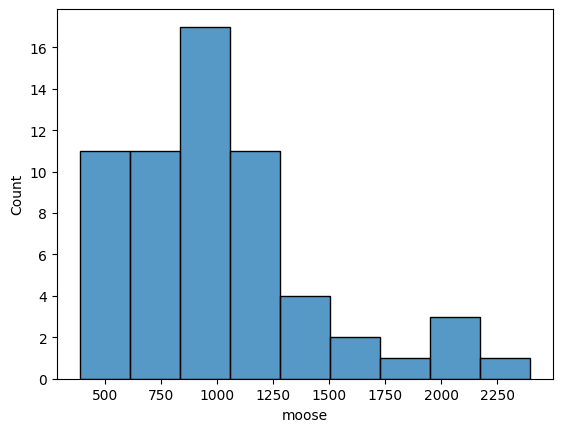

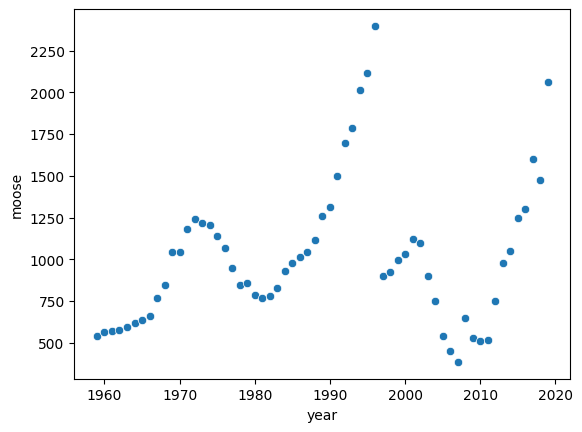

In [ ]:
print(wolf_moose_yearly["moose"].describe())
sb.histplot(wolf_moose_yearly["moose"])
plt.show()
sb.scatterplot(x="year", y="moose", data=wolf_moose_yearly)
plt.show()

The distribution of the moose number is unimodal and right-skewed (has long tail on the right), with no obvious outliers. The median of the moose number is 975, and the IQR is 453. This means a typical value for moose number is 975, and about 50% of the moose numbers estimated each year are within 750 and 1203.

#### Numeric Variable

count     662.000000
mean     1737.115421
std       251.718047
min      1073.063000
25%      1541.784250
50%      1694.415000
75%      1935.307750
max      2472.569000
Name: Cranial Volume (cm3), dtype: float64


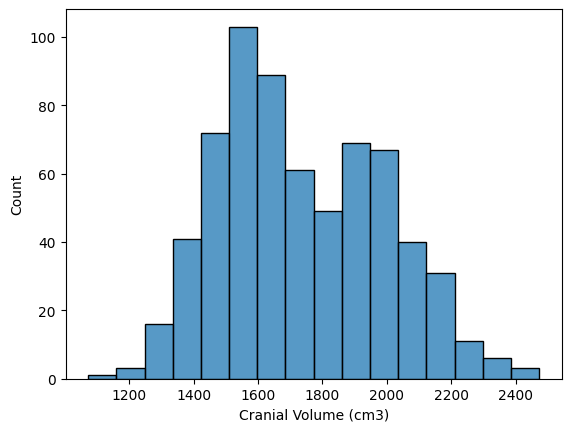

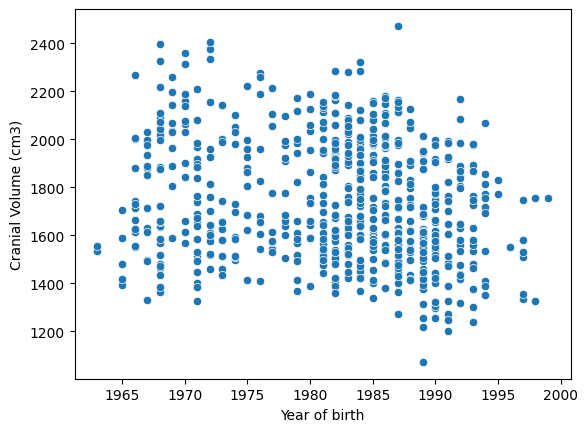

In [ ]:
print(moose_deaths["Cranial Volume (cm3)"].describe())
sb.histplot(moose_deaths["Cranial Volume (cm3)"])
plt.show()
sb.scatterplot(x="Year of birth", y="Cranial Volume (cm3)", data=moose_deaths)
plt.show()

The cranial volume (cm3) is bimodal and slighly right skewed with no obvious outlier. The median is 1694.415, and the mean is 1737.115. So, a typical value of cranial volume is 1694 cm^3.

### Multivariate Exploration


**Task**: In this section, select pairs of variables of combination of types listed below and describe either the joint distributions or conditional distributions in which you condition on one of the variables. Include at least one plot and at least one numerical summary in your description.



#### Discrete-Discrete

Sex                               Female  Male
Winter temperature (categorical)              
cold                                 167   174
warm                                 149   172


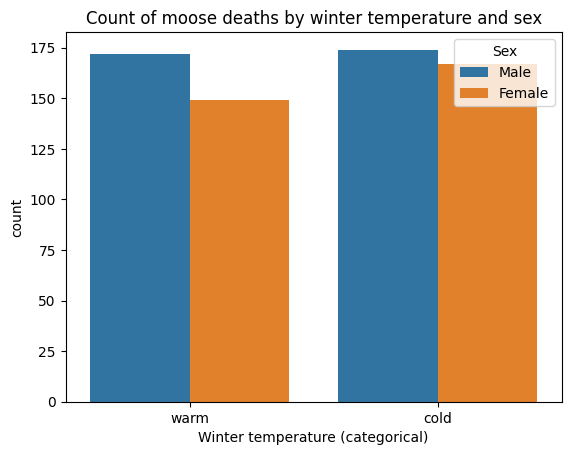

In [ ]:
contingency_table = pd.crosstab(moose_deaths["Winter temperature (categorical)"], moose_deaths['Sex'])
print(contingency_table)
sb.countplot(x="Winter temperature (categorical)", hue="Sex", data=moose_deaths)
plt.title("Count of moose deaths by winter temperature and sex")
plt.show()

In [ ]:
moose_deaths['Winter_temp_num'] = pd.factorize(moose_deaths['Winter temperature (categorical)'])[0]

group1 = moose_deaths[moose_deaths['Sex'] == 'Female']['Winter_temp_num']
group2 = moose_deaths[moose_deaths['Sex'] == 'Male']['Winter_temp_num']

n1 = len(group1)
n2 = len(group2)
s1 = np.std(group1, ddof=1)
s2 = np.std(group2, ddof=1)
sp = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

mean_diff = np.mean(group1) - np.mean(group2)

cohens_d = mean_diff / sp

print(f"Cohen's d: {cohens_d}")

Cohen's d: 0.05114437519326108


For warm winter temperatures, Both male and female moose have reduced deaths, compared with cold winter temperatures. Female moose have more reduced deaths compared with male. In general, female moose have fewer deaths than male. The effect size is around 0.05, which means the difference between female and male moose is relatively small.

#### Discrete-Numeric

        count         mean         std       min       25%        50%  \
Sex                                                                     
Female  316.0  1538.329051  132.852363  1073.063  1449.461  1539.4845   
Male    346.0  1918.665980  189.821900  1474.993  1783.178  1919.8235   

               75%       max  
Sex                           
Female  1614.70775  2059.137  
Male    2042.48200  2472.569  


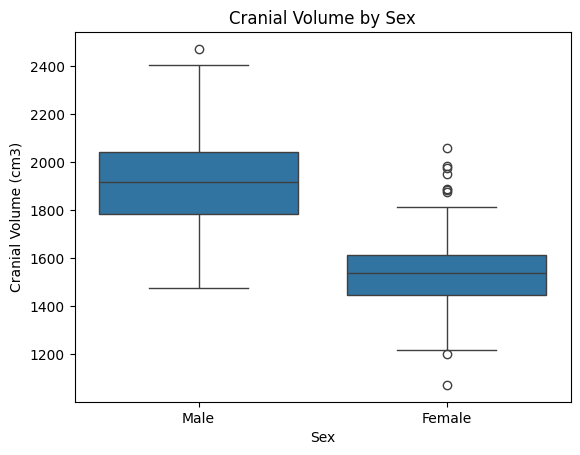

In [ ]:
print(moose_deaths.groupby('Sex')['Cranial Volume (cm3)'].describe())

sb.boxplot(x='Sex', y='Cranial Volume (cm3)', data=moose_deaths)
plt.title('Cranial Volume by Sex')
plt.show()

The cranial volume of male moose is significantly larger than that of female moose and also has larger variation. The mean cranial volume of male moose is 1919 cm^3, while that of female moose is 1538 cm^3.

#### Numeric-Numeric

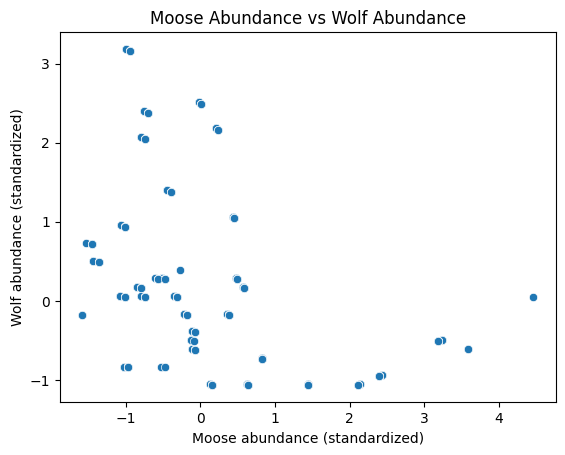

                                Moose abundance (standardized)  \
Moose abundance (standardized)                        1.000000   
Wolf abundance (standardized)                        -0.431542   

                                Wolf abundance (standardized)  
Moose abundance (standardized)                      -0.431542  
Wolf abundance (standardized)                        1.000000  


In [ ]:
sb.scatterplot(x='Moose abundance (standardized)', y='Wolf abundance (standardized)', data=moose_deaths)
plt.title('Moose Abundance vs Wolf Abundance')
plt.show()

# Numerical Summary
correlation = moose_deaths[['Moose abundance (standardized)', 'Wolf abundance (standardized)']].corr()
print(correlation)

The correlation between moose abundance and wolf abundance is -0.432, which means wolf abundance and moose abundance have moderate negative linear relationship. As wolf number increases, moose number decreases.

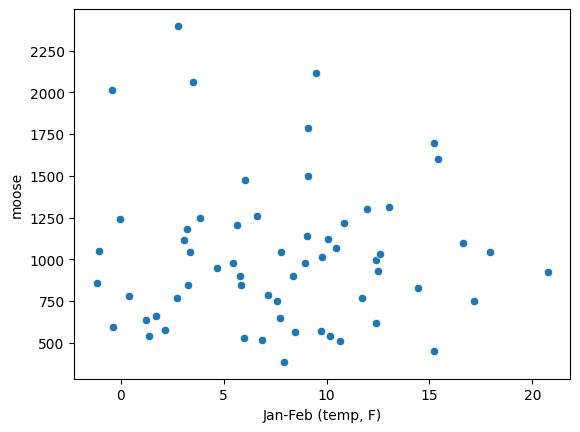

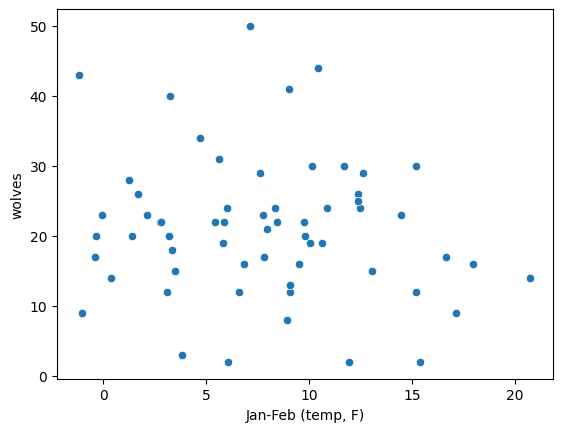

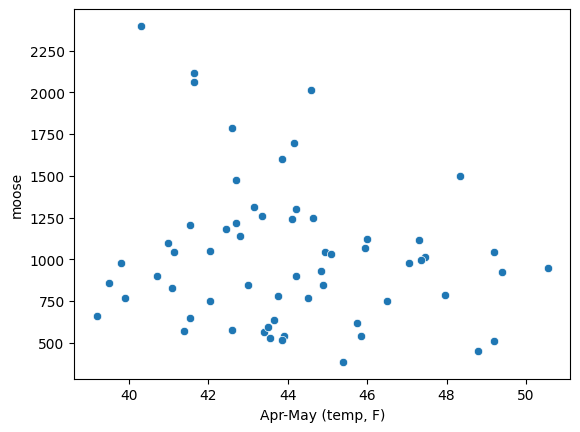

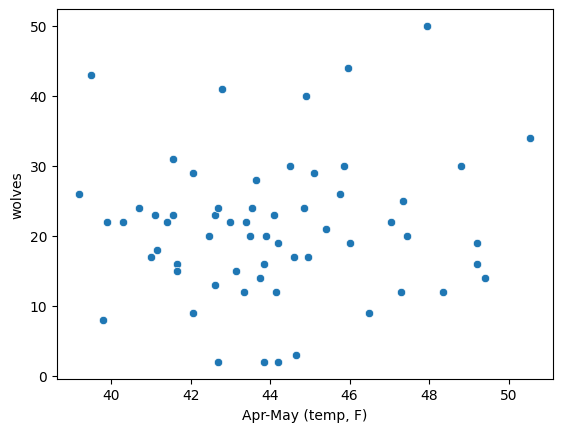

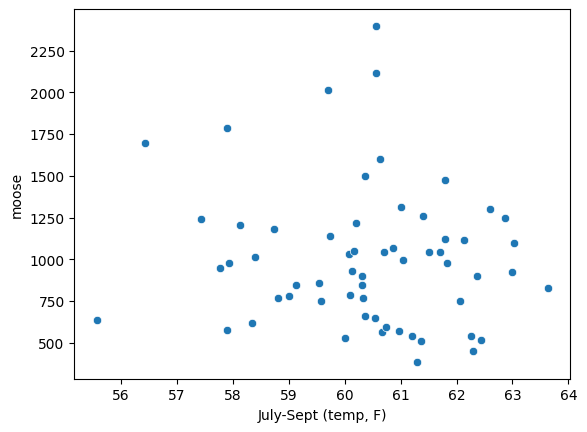

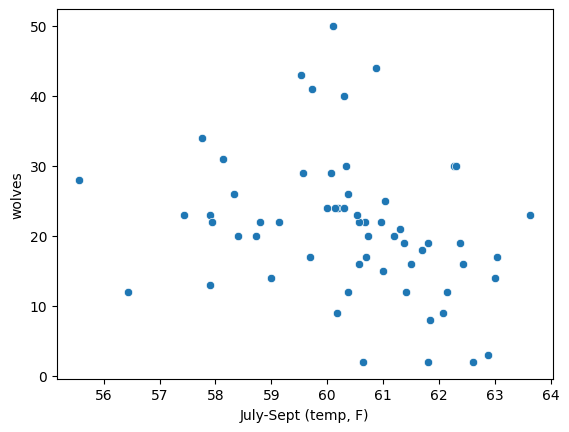

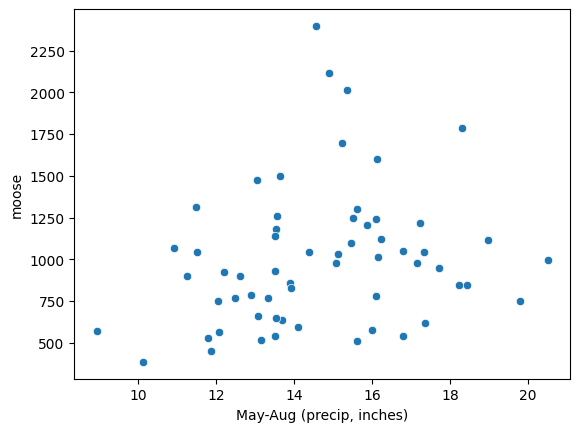

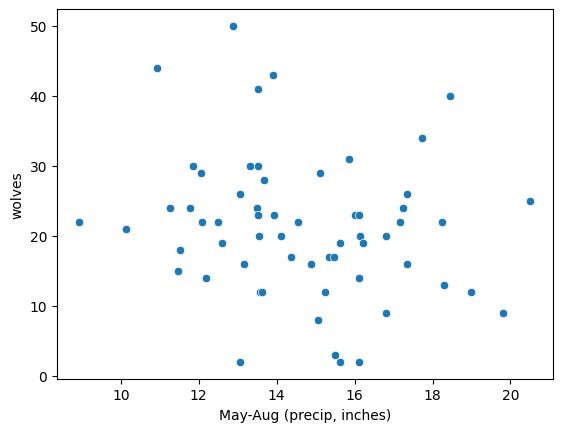

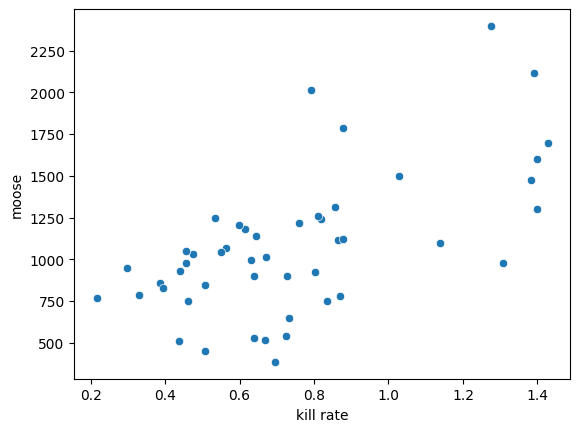

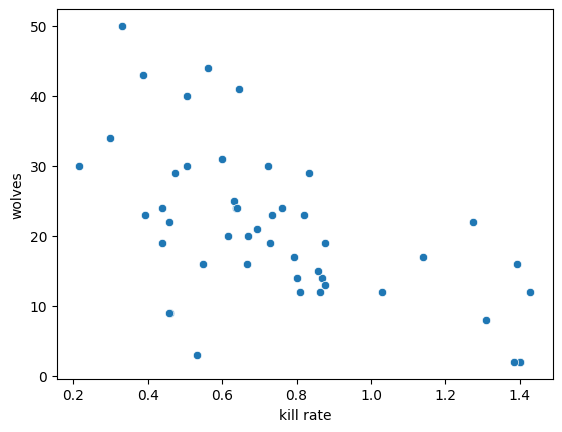

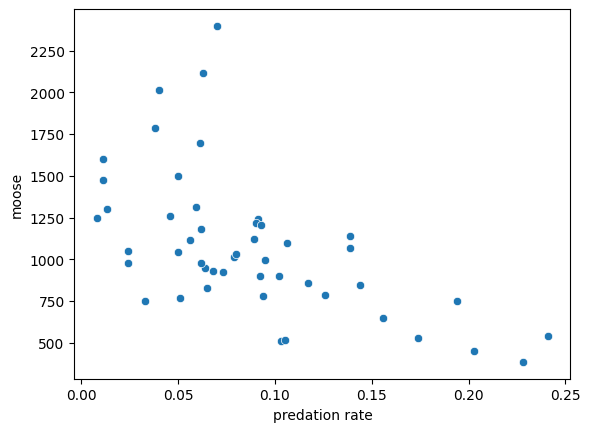

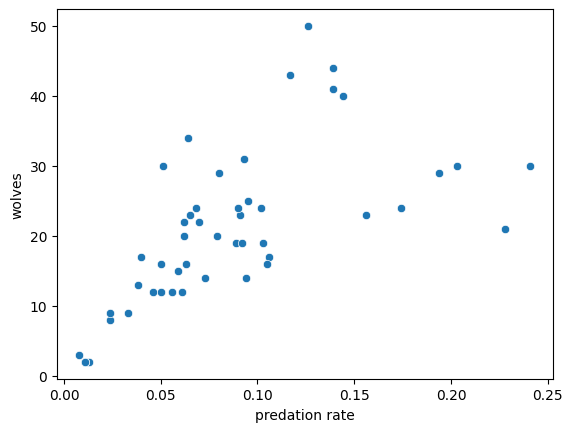

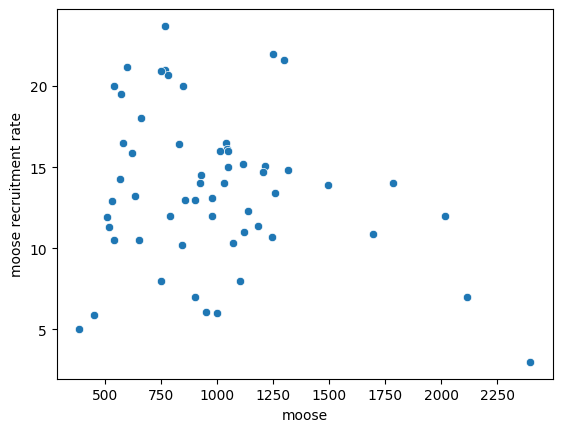

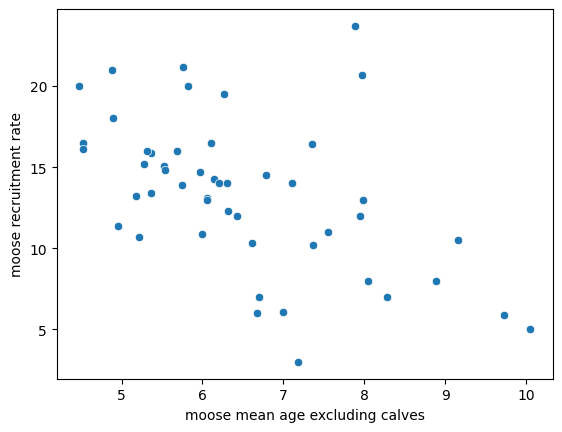

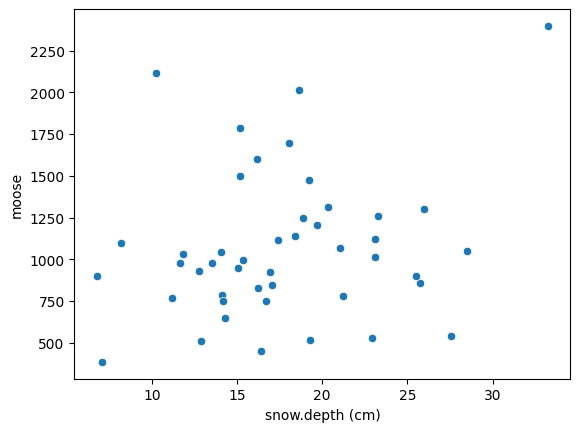

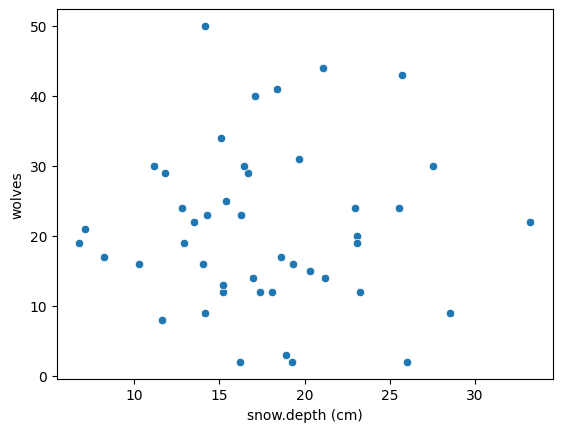

In [ ]:
sb.scatterplot(x="Jan-Feb (temp, F)",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="Jan-Feb (temp, F)",y="wolves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="Apr-May (temp, F)",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="Apr-May (temp, F)",y="wolves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="July-Sept (temp, F)",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="July-Sept (temp, F)",y="wolves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="May-Aug (precip, inches)",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="May-Aug (precip, inches)",y="wolves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="kill rate",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="kill rate",y="wolves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="predation rate",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="predation rate",y="wolves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(y="moose recruitment rate",x="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(y="moose recruitment rate",x="moose mean age excluding calves",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="snow.depth (cm)",y="moose",data=wolf_moose_yearly)
plt.show()
sb.scatterplot(x="snow.depth (cm)",y="wolves",data=wolf_moose_yearly)
plt.show()

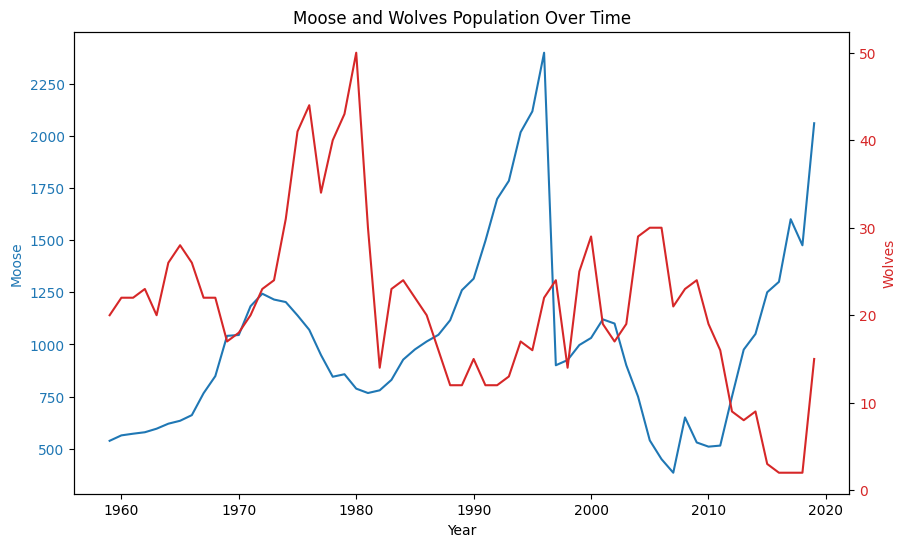

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Moose', color=color)
ax1.plot(wolf_moose_yearly['year'], wolf_moose_yearly['moose'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Wolves', color=color)
ax2.plot(wolf_moose_yearly['year'], wolf_moose_yearly['wolves'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Moose and Wolves Population Over Time')

plt.show()

### Summary

**Task**: Based on your exploration of these data, write up a paragraph of your findings. What are the key features of the data? What relationships do you see between the variables? What variables might be related to the populations of wolves and moose on Isle Royale? Consider how these questions can be answered in the next section when we perform inference.

There are many numeric, especially continuous variables in our data. There are few discrete or categorical variables. There are wolves and moose dynamics data such as species population and predation rate, as well as environment data such as temperatures, precipation, and snow depth. Many variables are inter-dependent. For example, winter temperatures affect the moose death, with warm winters incurring fewer deaths. Besides, the sex of moose has a large impact on their cranial volume, with females having smaller cranial volume. The predation rate is positively related to wolves number and negatively related to moose number. The kill rate is just the opposite. The moose recruitment rate is negatively related to mean age of moose, so the increase in the mean age of moose excluding the calves leads to less recruitment. The populations of wolves and moose are related to each other's population, the predation rate or kill rate, July-Sept (temp, F), May-Aug (precip, inches), and moose recuitment rate.

## Inference

In this section we will perform inference: make guesses about populations or future data based on our sample data.

### Population and Sampling

**Task**: Describe the population of interest in this study. What is the population you are trying to make inferences about? What is the sample in this study? What is the relationship between the population and the sample? You may consider hypothetical populations or data generating processes if you find those more natural to articulate.

We are trying to make inferences about the population of the numbers of moose and wolves at royale island at different years. The sample is the 61 years of moose and wolves number tracked, which is a section of the population in the time series. Around the population of interest, we have also collected the samples of potential factor variables such as the environment and statistics data of their interaction (kill rate or predation rate).

### Hypothesis Testing

#### Theory

**Task**: give a theory you would like to test about the population you identified in the previous section. Explain how you can use the format of a hypothesis to test that theory. Clearly describe the population parameter, parameter space, null hypothesis, and alternative hypothesis you will use to test this theory.

I would like to propose a hypothesis that there is a linear relationship between the kill rate and the wolves population, which means the kill rate changes linearly as wolves popultaion changes. To test the hypothesis, we can formulate 𝛽 (population parameter) as the population slope of the population linear regression line of kill rate and the wolves population. The 𝛽 is the average change in the kill rate corresponds to one increase in wolves population. The parameter space is (-1,1), as the kill rate is limited to (0,1). As the wolves population changes, 𝛽 cannot exceed the range of (-1,1). The null hypothesis is $𝛽=0$, while the alternative hypothesis is $𝛽\neq0$.

#### Application

**Task**: Select a tolerance for Type I error ($\alpha$-level). Perform the hypothesis test you described in the previous section. Report the results of the test using either a rejection region or a p-value. Do you reject the null hypothesis? What is your conclusion about the theory you tested?

                            OLS Regression Results                            
Dep. Variable:              kill rate   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     24.49
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           1.04e-05
Time:                        04:52:42   Log-Likelihood:                -2.6966
No. Observations:                  48   AIC:                             9.393
Df Residuals:                      46   BIC:                             13.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1027      0.081     13.618      0.0

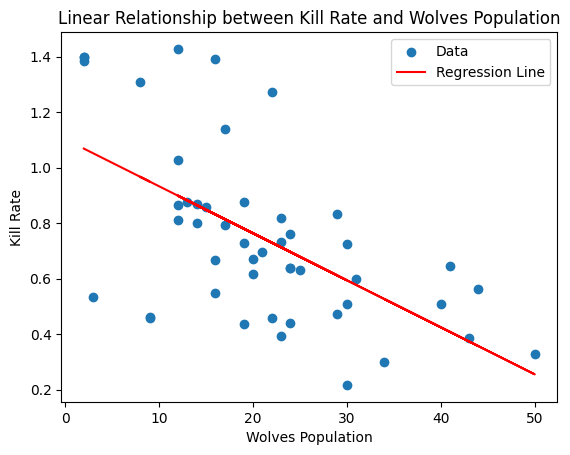

In [ ]:
X0, Y = wolf_moose_yearly['wolves'].dropna().align(wolf_moose_yearly['kill rate'].dropna(), join='inner', axis=0)
X = sm.add_constant(X0)
model = sm.OLS(Y, X).fit()

print(model.summary())

plt.scatter(wolf_moose_yearly['wolves'], wolf_moose_yearly['kill rate'], label='Data')
plt.plot(X0, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Wolves Population')
plt.ylabel('Kill Rate')
plt.title('Linear Relationship between Kill Rate and Wolves Population')
plt.legend()
plt.show()


At a significance level of $α= 0.1$, the p-value for the slope $𝛽$ is approximately zero, much smaller than 0.1, so we reject the null hypothesis. We can conclude that there is a linear relationship between the kill rate and the wolves population.

### Confidence Interval

#### Theory

**Task**: Identify a different population parameter than the one you used in the previous section. Explain how you can use the format of a confidence interval to make inferences about this population parameter. Clearly describe the population parameter, confidence level, and confidence interval you will use to make inferences about this population parameter.

Then, we can make an inference about the death age of moose to see whether the moose at royale islands die at similar ages as other moose in the world. We define the population parameter as the mean death age of moose. We set the confidence level at 95%, which means 95% of such CI will include the true population mean of the death age of moose. Next, we can construct the confidence interval of the population mean death age of moose at royale island using bootstrap strategy as we do not know the population distribution of moose death age.

#### Application

**Task**: Select a confidence level for your confidence interval. Compute the confidence interval for the population parameter you identified in the previous section. Report the results of the confidence interval. What is your conclusion about the population parameter you are making inferences about? What does this tell you about wolves and moose on Isle Royale?

In [ ]:
age_at_death = moose_deaths['Age at death']
sample_mean = age_at_death.mean()

n = len(age_at_death)
bootstrap_means = [age_at_death.sample(n, replace=True).mean() for _ in range(10000)]

bootstrap_means = pd.Series(bootstrap_means)

ci_lower = bootstrap_means.quantile(0.025)
ci_upper = bootstrap_means.quantile(0.975)

print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

95% Confidence Interval: (11.034743202416918, 11.564992447129908)


With a confidence level of 95%, the population mean death age of moose at the royale island is between 11.03 and 11.57. The natural lifespan of moose is estimated to be ranging from 15 to 20 years. We can observe that the mean lifespan of moose at royale island is much shorter than the natural lifespan, which indicates there is likely to be severe influence from the environment that shortens their life such as the predation of wolves, or the cold weather.

### Regression

#### Theory

Linear regression is a statistical method that models the relationship between the conditional mean of an outcome and one or more predictors as a linear function:

$$E(Y \mid x_1, x_2, \ldots ) = a + b_1 x_1 + b_2 x_2 + \ldots $$

**Task**: Identify an outcome and two or more predictors you think may be related to the conditional mean of the outcome. Explain how you can use linear regression to model the relationship between the outcome and the predictors. Explain how linear regression can be used to test theories about the relationships between the outcome and the predictors; in particular comment on what it would mean if $b = 0$ for each of the predictors in the model.

To further evaluate the relationship of moose number and various factors, we can apply linear regression to multi-variables, namely, the wolves number, the predation rate, the kill rate, the moose recruitment rate, and the July-Sept (temp, F). We can set the outcome to be the moose number, and the predictors to be the those aforementioned. From the linear regression, we can observe how the moose number changes linearly with the predictors about the strength and direction of the linear relationship. The estimate of moose number from the linear regression is the conditional mean at certain conditions of all the five predictors. If $b=0$ for any predictor, the moose number has no relationship with that predictor.

#### Application

**Task**: Fit a linear regression model to the data. Report the results of the model. What are the coefficients of the model? What is the interpretation of the coefficients? Given either confidence intervals or hypothesis tests to test if $b = 0$ for each coefficient. What do you conclude about the relationships between the predictors and the outcome based on those intervals/tests? What is the $R^2$ of the model? What is the interpretation of the $R^2$?

In [ ]:
columns_of_interest = ['wolves', 'predation rate', 'kill rate', 'moose recruitment rate', 'July-Sept (temp, F)']
y = wolf_moose_yearly['moose'] #outcome
X = wolf_moose_yearly[columns_of_interest]

X_clean = X.dropna()
y_clean = y[X_clean.index].dropna()
X_clean = sm.add_constant(X_clean)

model = sm.OLS(y_clean, X_clean)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  moose   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     20.68
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           3.76e-10
Time:                        04:52:44   Log-Likelihood:                -313.68
No. Observations:                  46   AIC:                             639.4
Df Residuals:                      40   BIC:                             650.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3309

From the p-values of the predictors, we can observe that moose number have linear relationship with the wolves number, predation rate, kill rate, and moose recruitment rate at the significance level of 0.05 (none of the predictors has $b=0$). There is not much evidence that moose number is linearly correlated to July-Sept temperature (maybe $b=0$). The coefficient for wolves, predation rate, kill rate, moose recruitment rate, and July-Sept tempreature are 14.04, -5908, 841.2, -21.34, -38.97. Also, from the confidence interval and p-values, we can conclude that moose number is positively correlated to wolves number and kill rate, negatively correlated to predation rate and moose recruitment rate. The $R^2$ is 0.721, which means the multi-linear model can explain 72.1% of the variability of the moose number. Even the adjusted $R^2$ is 0.686, which means the model is very explanatory.

### Classification

#### Theory

**Task**: Select a different outcome than the previous section that would be appropriate to use with a classification technique and predictors your think may be related to the outcome. Select a classification technique that you think would be appropriate for this data. Explain how you can use classification to model the relationship between the outcome and the predictors. Explain how classification can be used to test theories about the relationships between the outcome and the predictors. Be sure to explain how either training-test sets or cross-validation can be used to evaluate the accuracy of the model.

On the other side, we can make inference about the factors of wolves number. To be specific, we can set the wolves number as the outcome which needs to be transformed into a categorical variable, while setting year, moose number, and kill rate as the classfiers. We classify the wolves number smaller than $median$ as low, and larger than or equal to $median$ as high.

We can apply both random forest method and logistic regression to train a classifier of wolves number, based on year, moose number, and kill rate. Random Forests work by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees. Logistic regression is a statistical model that is used to predict the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. It is a type of regression analysis used for predicting the outcome of a categorical dependent variable, which can take on two possible outcomes, hence it is also known as binary logistic regression when there are only two outcomes.

Based on the classification, we can observe the conditions for more wolves or fewer wolves, which imply the positive or negative relationship of the predictors to the outcome wolves number.

During the process, we apply cross-validation to test the accuracy of our model. Basically, cross-validation randomly partition the data set into 'K' equal-sized folds or subsets. Of the K folds, a single fold is retained as the validation data for testing the model, and the remaining K-1 folds are used as training data. This process is repeated K times, with each of the K folds used exactly once as the validation data. The K results from the folds can then be averaged to produce a single estimation.

#### Application

**Task**: Use the classification technique you selected to model the relationship between the outcome and the predictors. Report the results of the model. Use the model to predict some interesting cases. Use either a training-test set split or cross validation to assess the accuracy of the classifier. If the classifier has tuning parameters, try several values of the tuning parameters to see how they affect the accuracy of the classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

print("Median wolves number: ", wolf_moose_yearly['wolves'].median())

def categorize_wolves(wolves_count):
    if wolves_count < wolf_moose_yearly['wolves'].median():
        return 'Low'
    elif wolves_count >= wolf_moose_yearly['wolves'].median():
        return 'High'

wolf_moose_yearly['wolves_category'] = wolf_moose_yearly['wolves'].apply(categorize_wolves)
X = wolf_moose_yearly[['year', 'moose', 'kill rate']].dropna()
y = wolf_moose_yearly['wolves_category'][X.index].dropna()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

logreg = LogisticRegression(max_iter=1000, random_state=48)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=48)

scores_random_forest = cross_val_score(rf_clf, X, y_encoded, cv=5)
scores_logistic_regression = cross_val_score(logreg, X, y_encoded, cv=5, scoring='accuracy')

print(f"Random forest Cross-validation scores: {scores_random_forest}")
print(f"Random forest Average cross-validation score: {scores_random_forest.mean()}")
print(f"Random forest Standard deviation of scores: {scores_random_forest.std()}")

print(f"Logistic Regression Cross-validation scores: {scores_logistic_regression}")
print(f"Logistic Regression Average cross-validation score: {scores_logistic_regression.mean()}")



Median wolves number:  21.0
Random forest Cross-validation scores: [0.4        1.         0.9        0.22222222 0.77777778]
Random forest Average cross-validation score: 0.6599999999999999
Random forest Standard deviation of scores: 0.2987711457468144
Logistic Regression Cross-validation scores: [0.5        1.         0.8        0.44444444 0.55555556]
Logistic Regression Average cross-validation score: 0.6599999999999999


In [ ]:
logreg.fit(X, y_encoded)
rf_clf.fit(X, y_encoded)

# Since we used LabelEncoder to encode the target variable, we need to reverse the encoding
# Define the inverse transform function
def inverse_label_transform(label_encoder, predicted_index):
    return label_encoder.inverse_transform([predicted_index])[0]


In [ ]:
input_data = pd.DataFrame({
    'year': [1988],
    'moose': [800],
    'kill rate': [1.1]
})

input_data_1 = pd.DataFrame({
    'year': [1976],
    'moose': [1000],
    'kill rate': [0.6]
})

input_data_2 = pd.DataFrame({
    'year': [1982],
    'moose': [800],
    'kill rate': [0.8]
})

input_data_3 = pd.DataFrame({
    'year': [1985],
    'moose': [400],
    'kill rate': [0.8]
})

input_data_4 = pd.DataFrame({
    'year': [2003],
    'moose': [1500],
    'kill rate': [0.8]
})


input_data_5 = pd.DataFrame({
    'year': [2030],
    'moose': [1500],
    'kill rate': [0.8]
})

# Function to make predictions and print results
def make_predictions(input_data):
    # Make predictions
    prediction_logreg = logreg.predict(input_data)
    prediction_rf = rf_clf.predict(input_data)

    # Apply inverse transform to get the original class label
    original_label_logreg = label_encoder.inverse_transform(prediction_logreg)[0]
    original_label_rf = label_encoder.inverse_transform(prediction_rf)[0]

    # Print the results
    print(f"Logistic Regression Prediction: {original_label_logreg}")
    print(f"Random Forest Prediction: {original_label_rf}")


make_predictions(input_data)
make_predictions(input_data_1)
make_predictions(input_data_2)
make_predictions(input_data_3)
make_predictions(input_data_4)
make_predictions(input_data_5)

Logistic Regression Prediction: High
Random Forest Prediction: Low
Logistic Regression Prediction: High
Random Forest Prediction: High
Logistic Regression Prediction: High
Random Forest Prediction: Low
Logistic Regression Prediction: High
Random Forest Prediction: High
Logistic Regression Prediction: Low
Random Forest Prediction: Low
Logistic Regression Prediction: Low
Random Forest Prediction: Low


The cross-validation score for random forest and logistic regression is 0.64 and 0.66 respectively (with random_state number both set to 42). Yet, by tuning the random_state to 48, both reach 0.66.

The two models are tested on six cases. The first is     'year': [1988],    'moose': [800],    'kill rate': [1.1]. The logistic regression model predicts it to be high (more wolves than median 21), while the random forest predicts it to be low (fewer wolves than median 21). The second is     'year': [1976],    'moose': [1000],    'kill rate': [0.6]. Both models predict it to be high (more wolves than median 21). The third is     'year': [1982],    'moose': [800],    'kill rate': [0.8]. The logistic regression model predicts it to be high (more wolves than median 21), while the random forest predicts it to be low (fewer wolves than median 21). The following cases can be observed from the code above and decoded similarly.

The result may indicate that all three predictors explain part of the variation in wolves number.

## Conclusion

**Task**: Write a conclusion to your analysis. Summarize the key findings of your analysis. What relationships did you find between the variables in the data? What inferences did you make about the populations of wolves and moose on Isle Royale? What theories did you test? What conclusions did you draw from those tests? What predictions did you make about the data? What conclusions did you draw from those predictions? What suggestions do you have for future data collection Isle Royale? What else would you like to learn about the populations of wolves and moose?

In this analysis, we have explored the relationship between wolf and moose populations on Isle Royale, focusing on their interactions and the environmental factors that might influence these dynamics. Key findings and insights include:

**Population Trends and Relationships**

There are many relationships between variables. For example, winter temperatures affect the moose death, with warm winters incurring fewer deaths. Besides, the sex of moose has a large impact on their cranial volume, with females having smaller cranial volume. The predation rate is positively related to wolves number and negatively related to moose number. The kill rate is just the opposite. The moose recruitment rate is negatively related to mean age of moose, so the increase in the mean age of moose excluding the calves leads to less recruitment. The populations of wolves and moose are related to each other's population, the predation rate or kill rate, July-Sept (temp, F), May-Aug (precip, inches), and moose recuitment rate.

**Hypothesis Testing and Predictions**

The project has tested following theories:
- There is a linear relationship between kill rate and wolf population.
- Predation from wolves, cold weather, and other harsh environmental conditions make the moose at isle Royale die earlier than normal.
- Moose number have linear relationship with the wolves number, predation rate, kill rate, moose recruitment rate, and July-Sept temperature.
- Wolves number can be dependent on year, moose number, and kill rate.

The conclusions are as follows:
- There is a moderate negative linear relationship between kill rate and wolf population.
- The population mean death age of moose at the royale island is between 11.03 and 11.57, much shorter than the normal lifespan ranging from 15 to 20. The reasons are likely the predation from wolves and the harsh environments.
- Moose number is positively correlated to wolves number and kill rate, negatively correlated to predation rate and moose recruitment rate.
- Wolves number are indeed dependent on year, moose number, and kill rate.

**Prediction and Conclusions**

There are six predictions with the two classifiers, namely, random forest and logistic regression. For 2/3 of the predictions, the two models align with each other. In general, the year near 1980, especially before 1980, lower kill rate, and smaller moose population are likely to lead "high" wolves population (more than the median value 21).

**Suggestions for Future Research**

Additional data collection on environmental variables such as food scarcity and disease outbreaks could provide deeper insights.
Expanding the dataset to include genetic diversity and reproduction rates of both species may help refine predictions.
Long-term monitoring and incorporating climate change scenarios could offer a more comprehensive understanding of the ecosystem's future.
This project highlights the intricate balance between predator and prey populations and emphasizes the need for continuous data collection and analysis to inform conservation efforts on Isle Royale. Future studies should aim to integrate multidisciplinary approaches and build models based on the biological dynamics instead of pure data to better predict and manage these complex ecological systems. I would like to learn more about the biological model fit with the data of the populations of wolves and moose.

## GenAI Appendix

### Template

Please copy this template and use it to indicate how you used GenAI tools in each section of the project.

* Section Title:
* Description of Use/Prompt:
* Output from GenAI Tool:

Example:

* Section Title: Univariate Exploration, Discrete Variable
* Description of Use/Prompt: I used ChatGPT to help me write a description of the distribution of the discrete variable.
* Output from GenAI Tool: The discrete variable is a categorical variable that represents different categories. The distribution of the discrete variable shows that the categories are not evenly distributed. Some categories have a higher frequency than others. The most common category is category 1, which occurs in 30% of the observations. The least common category is category 3, which occurs in 10% of the observations.

* Section Title: Inference, Confidence Interval
* Description of Use/Prompt: I used ChatGPT to find the average lifespan of moose
* Output from GenAI Tool: The average lifespan of a moose is 15 to 20 years in the wild. However, many moose do not reach their full potential lifespan due to predation, hunting, disease, and harsh environmental conditions. Factors like habitat quality and food availability also influence their longevity. In captivity, where they are protected from predators and given proper care, they may live slightly longer.





* Section Title: Inference, Classification
* Description of Use/Prompt: I used KIMI to explain the principle of logistic regression
* Output from GenAI Tool:
Logistic regression is a statistical model that is used to predict the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. It is a type of regression analysis used for predicting the outcome of a categorical dependent variable, which can take on two possible outcomes, hence it is also known as binary logistic regression when there are only two outcomes.

Here's how logistic regression works:

1. **Logistic Function (Sigmoid Function)**:
   - The logistic regression model uses the logistic function, also known as the sigmoid function, which is a mathematical function that takes any real-valued number and squashes it into a value between 0 and 1. The function is defined as:
     \[ \sigma(z) = \frac{1}{1 + e^{-z}} \]
     where \( z \) is the linear combination of the input features, often represented as \( z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k \), and \( \beta \) are the coefficients to be estimated.

2. **Probability Estimation**:
   - The output of the sigmoid function represents the probability that the dependent variable belongs to one of the two classes. For example, if we are trying to predict the probability of an event occurring, the output of the logistic function would give us this probability.

3. **Predicted Class**:
   - A decision threshold, typically 0.5, is used to convert the probability into a class prediction. If the predicted probability is greater than 0.5, the model predicts the positive class; otherwise, it predicts the negative class.

4. **Cost Function and Optimization**:
   - The model's parameters are estimated using a cost function, often the log-likelihood cost function, which is the negative log of the likelihood of the observed outcomes given the model's predictions. The goal is to find the parameters that maximize the likelihood of the observed data, which is equivalent to minimizing the cost function.
   - Optimization algorithms, such as gradient descent, are used to iteratively adjust the model parameters to minimize the cost function.

5. **Maximum Likelihood Estimation**:
   - Logistic regression finds the parameter estimates that maximize the likelihood that the observed outcomes would be observed. This is known as maximum likelihood estimation (MLE).

6. **Model Interpretation**:
   - The coefficients of the logistic regression model can be interpreted as the change in the log-odds of the outcome for a one-unit change in the predictor variable, holding all other variables constant.

7. **Extensions**:
   - While binary logistic regression deals with two-class problems, the concept can be extended to multi-class classification problems using techniques such as one-vs-rest or multinomial logistic regression.

Logistic regression is widely used because it is simple to understand and interpret, and it performs well even with a small sample size. It is also less sensitive to outliers and can handle non-linear relationships between the independent and dependent variables through the use of polynomial terms or other feature transformations.
